FLIPKART RECOMMNEDATION SYSTEM

In [73]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [74]:
print("Loading data...")
df=pd.read_csv(r"/home/intellect/Documents/Unsupervised_recommendsystem/flipkart_com-ecommerce_sample.csv")
print(df.shape)

Loading data...
(20000, 15)


In [75]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [76]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [78]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [79]:
df['brand'].fillna('Unknown', inplace=True)

/tmp/ipykernel_18599/2973429225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown', inplace=True)


In [80]:
df.isnull().sum()

uniq_id                     0
crawl_timestamp             0
product_url                 0
product_name                0
product_category_tree       0
pid                         0
retail_price               78
discounted_price           78
image                       3
is_FK_Advantage_product     0
description                 2
product_rating              0
overall_rating              0
brand                       0
product_specifications     14
dtype: int64

In [81]:
df.dropna(subset=['retail_price','discounted_price'],inplace=True)

In [82]:
#product_rating and overall_rating columns are strings, convert them to numeric values
def clean_rating(x):
    try:
        return float(x)
    except:
        return 0.0
df['rating']=df['product_rating'].apply(clean_rating)

In [83]:
#converting discount to discount percentage
df['discount_pct']=(
    (df['retail_price']-df['discounted_price'])/df['retail_price']
)*100

In [84]:
#extracting main category 
df['main_category']=df['product_category_tree'].apply(
    lambda x: str(x).split('>>')[0]
    .replace('[','')
    .replace('"','')
    .strip()
)

In [85]:
df.isnull().sum()

uniq_id                     0
crawl_timestamp             0
product_url                 0
product_name                0
product_category_tree       0
pid                         0
retail_price                0
discounted_price            0
image                       3
is_FK_Advantage_product     0
description                 2
product_rating              0
overall_rating              0
brand                       0
product_specifications     12
rating                      0
discount_pct                0
main_category               0
dtype: int64

In [86]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,rating,discount_pct,main_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0.0,62.062062,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",0.0,29.576764,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",0.0,50.050050,Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0.0,61.802575,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",0.0,4.545455,Pet Supplies


In [87]:
df.drop('dicount_pct', axis=1, inplace=True)

KeyError: "['dicount_pct'] not found in axis"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_brand=LabelEncoder()
le_category=LabelEncoder()
df['brand_encoded']=le_brand.fit_transform(df['brand'])
df['category_encoded']=le_category.fit_transform(df['main_category'])

In [ ]:
df.head(7)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,rating,main_category,brand_encoded,category_encoded,discount_pct
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0.0,Clothing,162,43,62.062062
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",0.0,Furniture,914,75,29.576764
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",0.0,Footwear,69,73,50.050050
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0.0,Clothing,162,43,61.802575
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",0.0,Pet Supplies,2654,150,4.545455
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",0.0,Eternal Gandhi Super Series Crystal Paper Weig...,864,63,0.000000
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0.0,Clothing,162,43,60.050042


In [ ]:
#selecting only the essential numeric features for clustering
features=df[
    [
    'retail_price',
    'discount_pct',
    'rating',
    'brand_encoded',
    'category_encoded']
]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(features)

In [ ]:
inertia=[]
k_range=range(1,11)
for K in k_range:
    kmeans=KMeans(n_clusters=K, random_state=42)
    df['cluster_kmeans']=kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
score_kmean=silhouette_score(X_scaled,df['cluster_kmeans'])
print("KMeans Silhouette Score: ",round(score_kmean,3))

KMeans Silhouette Score:  0.338


In [ ]:
cluster_profile = df.groupby("cluster_kmeans").agg({
    "retail_price": "mean",
    "discount_pct": "mean",
    "rating": "mean"
}).round(2)

cluster_profile

,retail_price,discount_pct,rating
cluster_kmeans,,,
0,1359.28,36.95,4.28
1,1444.85,55.48,0.03
2,1328.51,27.31,0.15
3,1814.84,19.02,0.01
4,2536.09,40.43,4.29
5,267805.00,23.33,0.00
6,1943.30,59.45,0.01
7,1342.46,12.75,0.02
8,38151.27,24.56,0.03


In [ ]:
cluster_labels = {
    0: "Best Value Products (High Rating & Good Discount)",
    1: "Low Engagement Products (Low Discount, Low Rating)",
    2: "Heavy Discount Products (Price-driven Buyers)",
    3: "Premium & Luxury Products",
    4: "Budget Products (Low Price, Low Engagement)",
    5: "High Discount – Low Rated Products",
    6: "Mid-Range Products (Balanced Features)",
    7: "Specialty Products (Niche Market)",
    8: "Trending Products",
    9: "Clearance Products"
}

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
df['cluster_hc']=hc.fit_predict(X_scaled)

In [ ]:
hc_score=silhouette_score(X_scaled,df['cluster_hc'])
print("Hierarchical Clustering Silhouette Score: ",round(hc_score,3))

Hierarchical Clustering Silhouette Score:  0.304


In [ ]:
dbscan=DBSCAN(eps=1.2,min_samples=5)
df['cluster_dbscan']=dbscan.fit_predict(X_scaled)   

In [ ]:
print(df['cluster_dbscan'].value_counts())

cluster_dbscan
 0    19890
-1       26
 1        6
Name: count, dtype: int64


In [ ]:
#clustering is high dimensional so we use PCA for 2D visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
df['pca1']=X_pca[:,0]
df['pca2']=X_pca[:,1]

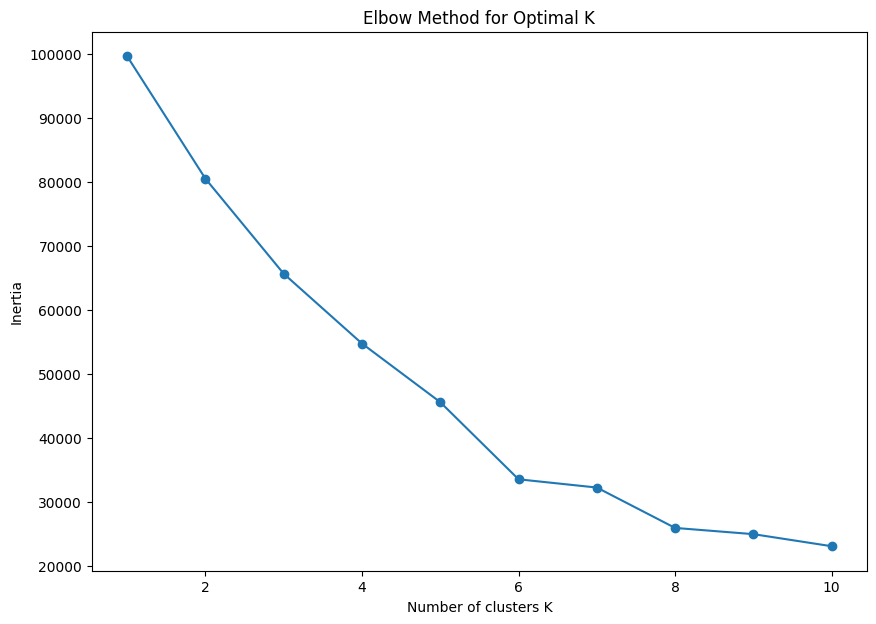

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters K")
plt.ylabel('Inertia')
plt.show()

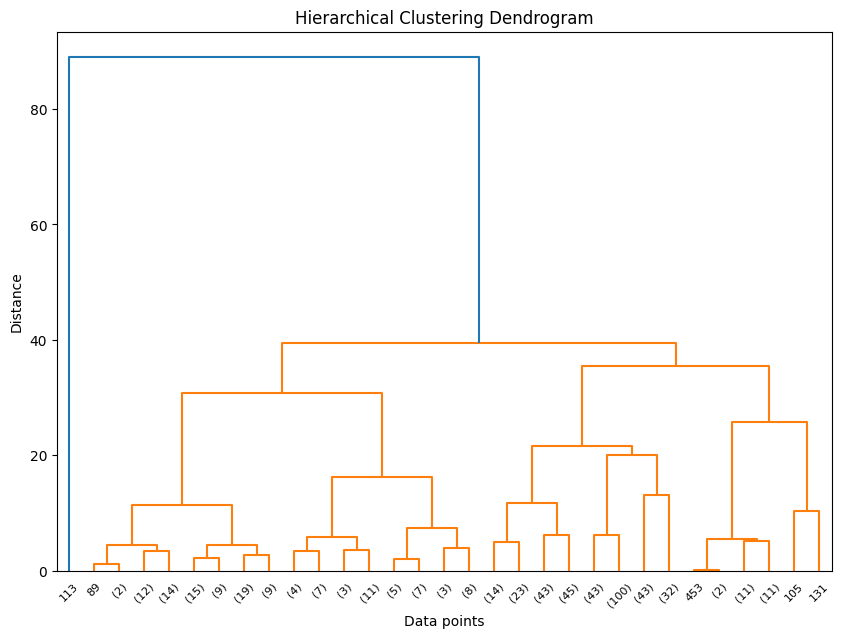

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

X_sample=X_scaled[:500]

linked=linkage(X_sample, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked,truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()  

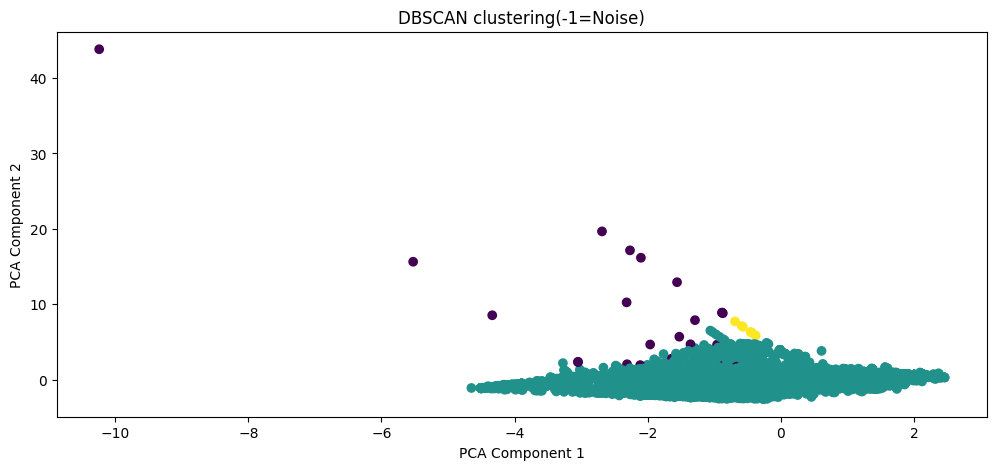

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_dbscan'])
plt.title("DBSCAN clustering(-1=Noise)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()  

In [ ]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,rating,main_category,brand_encoded,category_encoded,discount_pct,cluster_kmeans,cluster_hc,cluster_dbscan,pca1,pca2
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,0.0,Clothing,162,43,62.062062,5,0,0,1.778204,0.652409
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,0.0,Furniture,914,75,29.576764,3,1,0,-0.093515,3.045053
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,0.0,Footwear,69,73,50.050050,5,0,0,1.166583,0.926098
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,0.0,Clothing,162,43,61.802575,5,0,0,1.775029,0.631984
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,0.0,Pet Supplies,2654,150,4.545455,4,2,0,-1.757202,0.209200


In [ ]:
def recommend(product_id,method='kmeans',top_n=5):
    cluster_col={
        'kmeans':'cluster_kmeans',
        'hierarchical':'cluster_hc',
        'dbscan':'cluster_dbscan'
    }
    if product_id not in df['uniq_id'].values:
        return "prodcut not found"
    if method not in cluster_col:
        return "invalid method"
    cluster_value=df.loc[
        df['uniq_id']==product_id,
        cluster_col[method]
    ].values[0]

    if method=='dbscan' and cluster_value==-1:
        return "Product is considered as noise, no recommendations available"

    result=df[
        (df[cluster_col[method]]==cluster_value)&
        (df['uniq_id']!=product_id)
    ]
    return result[
        ['product_name','brand','main_category',
        'retail_price','discount_pct','rating']
        ].head(top_n)

In [ ]:
pid=df.iloc[0]['uniq_id']

recommend(pid, method='kmeans')
recommend(pid, method='hierarchical')
recommend(pid, method='dbscan')

,product_name,brand,main_category,retail_price,discount_pct,rating
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,Furniture,32157.0,29.576764,0.0
2,AW Bellies,AW,Footwear,999.0,50.050050,0.0
3,Alisha Solid Women's Cycling Shorts,Alisha,Clothing,699.0,61.802575,0.0
4,Sicons All Purpose Arnica Dog Shampoo,Sicons,Pet Supplies,220.0,4.545455,0.0
5,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,0.000000,0.0


In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_brand, 'brand_encoder.pkl')
joblib.dump(le_category, 'category_encoder.pkl')

['category_encoder.pkl']

In [ ]:
joblib.dump(features.columns.tolist(), 'feature_columns.pkl')
joblib.dump(cluster_labels, 'cluster_labels.pkl')   

['cluster_labels.pkl']